Objetivo: Analisar os dados do E-commerce e responder algumas perguntas de negócio
1-Qual região vende mais ?
\n
2-Qual a forma de pagamento mais utilizada pelos clientes ?
\n
3-Qual o departamento que obteve o mais faturamento ?
\n
4-Qual categoria de pagamento obteve o maior número de vendas no trimestre ?
\n
5- Qual a proporção de usuários utilizam o Cashback em suas compras ?
\n
6-Analisar as notas dadas pelos clientes durante as compras e verificar qual a nota que os clientes mais atribuíram ?
\n
7-Verificar o gênero e a idade que mais realizam compras ? \n
8-Verificar se existe outliers na diferença de idade entre os gêneros ? \n
9-Agrupar as vendas por estado e região?



In [1]:
# importando as bibliotecas
#Primeiramente, importaremos a biblioteca
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
#pip install plotly

In [2]:
#URLs para referência
url_clientes = "https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/dados/zoop_clientes.csv"

url_vendas = "https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/dados/zoop_vendas.csv"

In [3]:
clientes = pd.read_csv(url_clientes)

In [4]:
clientes.head()

,ID_compra,ID_cliente,cidade,uf,regiao,idade,sexo_biologico,cashback,avaliacao_compra
0,904,8972,Natal,Rio Grande do Norte,Nordeste,49,Masculino,Não,9
1,4613,5120,São Paulo,São Paulo,Sudeste,49,Feminino,Não,9
2,5579,1847,São Paulo,São Paulo,Sudeste,24,Feminino,Não,8
3,2405,2846,São Paulo,São Paulo,Sudeste,38,Feminino,Sim,7
4,2485,2715,Salvador,Bahia,Nordeste,30,Feminino,Não,10


In [5]:
vendas = pd.read_csv(url_vendas)

In [6]:
vendas.head()

,ID_compra,data,horario,categoria,preco_unitario,quantidade,frete,metodo_pagamento
0,6,2023-01-03,20:40,Eletrônicos,4457.9,4,713.26,Boleto
1,5,2023-01-03,21:48,Ferramentas e construção,115.9,1,0.00,PIX
2,9,2023-01-03,17:08,Beleza e cuidados pessoais,68.9,2,13.78,Cartão de Crédito
3,4,2023-01-03,14:29,Ferramentas e construção,80.9,5,40.45,PIX
4,8,2023-01-03,18:02,Beleza e cuidados pessoais,165.0,4,0.00,PIX


In [7]:
#obtendo informações do dataframe clientes
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID_compra         6169 non-null   int64 
 1   ID_cliente        6169 non-null   int64 
 2   cidade            6169 non-null   object
 3   uf                6169 non-null   object
 4   regiao            6169 non-null   object
 5   idade             6169 non-null   int64 
 6   sexo_biologico    6169 non-null   object
 7   cashback          6169 non-null   object
 8   avaliacao_compra  6169 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 433.9+ KB


In [8]:
# obtendo informações do dataframe vendas
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID_compra         6169 non-null   int64  
 1   data              6169 non-null   object 
 2   horario           6169 non-null   object 
 3   categoria         6169 non-null   object 
 4   preco_unitario    6169 non-null   float64
 5   quantidade        6169 non-null   int64  
 6   frete             6169 non-null   float64
 7   metodo_pagamento  6169 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 385.7+ KB


In [9]:
clientes.describe() # analise estatistica

,ID_compra,ID_cliente,idade,avaliacao_compra
count,6169.000000,6169.000000,6169.000000,6169.000000
mean,3085.000000,5461.475280,38.260010,8.443670
std,1780.981237,2610.959977,9.838951,1.730584
min,1.000000,1005.000000,18.000000,0.000000
25%,1543.000000,3148.000000,31.000000,8.000000
50%,3085.000000,5436.000000,38.000000,9.000000
75%,4627.000000,7748.000000,45.000000,9.000000
max,6169.000000,9999.000000,70.000000,10.000000


In [10]:
vendas.describe()

,ID_compra,preco_unitario,quantidade,frete
count,6169.000000,6169.000000,6169.000000,6169.000000
mean,3085.000000,873.234738,3.004863,119.233832
std,1780.981237,1852.064342,1.420725,366.149225
min,1.000000,2.900000,1.000000,0.000000
25%,1543.000000,44.900000,2.000000,0.320000
50%,3085.000000,93.900000,3.000000,7.550000
75%,4627.000000,221.900000,4.000000,29.240000
max,6169.000000,8000.000000,5.000000,4521.540000


In [11]:
# contagem dos clientes por sexo
clientes['sexo_biologico'].value_counts() # value counts realiza a contagem dos elementos de uma coluna
# do dataframe

sexo_biologico
Feminino     3371
Masculino    2798
Name: count, dtype: int64

In [12]:
# calculando a média das idades dos clientes
clientes['idade'].mean()

38.2600097260496

In [13]:
# Clientes por região
clientes['regiao'].value_counts()

regiao
Sudeste         2666
Nordeste        1882
Sul              819
Centro-Oeste     495
Norte            307
Name: count, dtype: int64

In [14]:
# Calculo da media das notas dos clientes
clientes['avaliacao_compra'].mean()

8.44366996271681

In [15]:
# Calculo da media das notas dos clientes
clientes['avaliacao_compra'].median()

9.0

In [16]:
# realizando a contagem de clientes que utilizam cashback em suas compras
clientes['cashback'].value_counts()

cashback
Não    3557
Sim    2612
Name: count, dtype: int64

In [17]:
# verificando as informações das vendas
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID_compra         6169 non-null   int64  
 1   data              6169 non-null   object 
 2   horario           6169 non-null   object 
 3   categoria         6169 non-null   object 
 4   preco_unitario    6169 non-null   float64
 5   quantidade        6169 non-null   int64  
 6   frete             6169 non-null   float64
 7   metodo_pagamento  6169 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 385.7+ KB


In [20]:
# convertendo a data de int 64 para datetime
vendas["data"] = pd.to_datetime(vendas["data"],format="%Y-%m-%d")

In [22]:
vendas.info() # exibe informações do dataframe vendas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID_compra         6169 non-null   int64         
 1   data              6169 non-null   datetime64[ns]
 2   horario           6169 non-null   object        
 3   categoria         6169 non-null   object        
 4   preco_unitario    6169 non-null   float64       
 5   quantidade        6169 non-null   int64         
 6   frete             6169 non-null   float64       
 7   metodo_pagamento  6169 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 385.7+ KB


In [23]:
# verificando a quantidade de vendas por departamento
vendas['categoria'].value_counts()

categoria
Alimentos e bebidas           1495
Beleza e cuidados pessoais    1062
Casa e limpeza                1041
Eletrodomésticos               665
Eletrônicos                    580
Papelaria e escritório         551
Ferramentas e construção       474
Livros                         301
Name: count, dtype: int64

In [24]:
# Calculo da média do preço unitário dos produtos
vendas['preco_unitario'].mean()

873.2347382071648

In [25]:
# Calculo da quantidade total de vendas
vendas['quantidade'].sum()

18537

In [29]:
#Calculo do valor total do frete
print("Valor total do frete",vendas['frete'].sum())
print("Valor do frete médio: ",vendas['frete'].mean())

Valor total do frete 735553.51
Valor do frete médio:  119.23383206354353


In [30]:
# Quantidade de pagamentos por tipo
vendas['metodo_pagamento'].value_counts()

metodo_pagamento
Cartão de Crédito    2851
PIX                  2244
Cartão de Débito      547
Boleto                527
Name: count, dtype: int64

In [31]:
# unindo os dois dataframes
df = pd.merge(vendas,clientes,on='ID_compra')

In [32]:
df.head()

,ID_compra,data,horario,categoria,preco_unitario,quantidade,frete,metodo_pagamento,ID_cliente,cidade,uf,regiao,idade,sexo_biologico,cashback,avaliacao_compra
0,6,2023-01-03,20:40,Eletrônicos,4457.9,4,713.26,Boleto,6149,Porto Alegre,Rio Grande do Sul,Sul,30,Masculino,Sim,10
1,5,2023-01-03,21:48,Ferramentas e construção,115.9,1,0.00,PIX,9491,São Paulo,São Paulo,Sudeste,36,Masculino,Sim,8
2,9,2023-01-03,17:08,Beleza e cuidados pessoais,68.9,2,13.78,Cartão de Crédito,5288,Porto Velho,Rondônia,Norte,39,Feminino,Não,7
3,4,2023-01-03,14:29,Ferramentas e construção,80.9,5,40.45,PIX,9679,Recife,Pernambuco,Nordeste,35,Masculino,Sim,9
4,8,2023-01-03,18:02,Beleza e cuidados pessoais,165.0,4,0.00,PIX,1380,São Paulo,São Paulo,Sudeste,50,Masculino,Não,9


In [33]:
# Organizando as colunas
colunas_organizadas=['ID_compra','data','horario','categoria','preco_unitario',
                     'quantidade','frete','metodo_pagamento','ID_cliente','idade',
                     'sexo_biologico','cidade','uf','regiao','cashback','avaliacao_compra'                     
]
df=df[colunas_organizadas]

In [34]:
df.head()

,ID_compra,data,horario,categoria,preco_unitario,quantidade,frete,metodo_pagamento,ID_cliente,idade,sexo_biologico,cidade,uf,regiao,cashback,avaliacao_compra
0,6,2023-01-03,20:40,Eletrônicos,4457.9,4,713.26,Boleto,6149,30,Masculino,Porto Alegre,Rio Grande do Sul,Sul,Sim,10
1,5,2023-01-03,21:48,Ferramentas e construção,115.9,1,0.00,PIX,9491,36,Masculino,São Paulo,São Paulo,Sudeste,Sim,8
2,9,2023-01-03,17:08,Beleza e cuidados pessoais,68.9,2,13.78,Cartão de Crédito,5288,39,Feminino,Porto Velho,Rondônia,Norte,Não,7
3,4,2023-01-03,14:29,Ferramentas e construção,80.9,5,40.45,PIX,9679,35,Masculino,Recife,Pernambuco,Nordeste,Sim,9
4,8,2023-01-03,18:02,Beleza e cuidados pessoais,165.0,4,0.00,PIX,1380,50,Masculino,São Paulo,São Paulo,Sudeste,Não,9


In [42]:
# Gerando tabela e gráfico
#Criando tabela metodos de pagamento
metodos_de_pagamento= df['metodo_pagamento'].value_counts().reset_index()
metodos_de_pagamento.columns = ['Metodo_de_pagamento', 'Quantidade']

In [43]:
metodos_de_pagamento

,Metodo_de_pagamento,Quantidade
0,Cartão de Crédito,2851
1,PIX,2244
2,Cartão de Débito,547
3,Boleto,527


Text(0.5, 1.0, 'Métodos de pagamento')

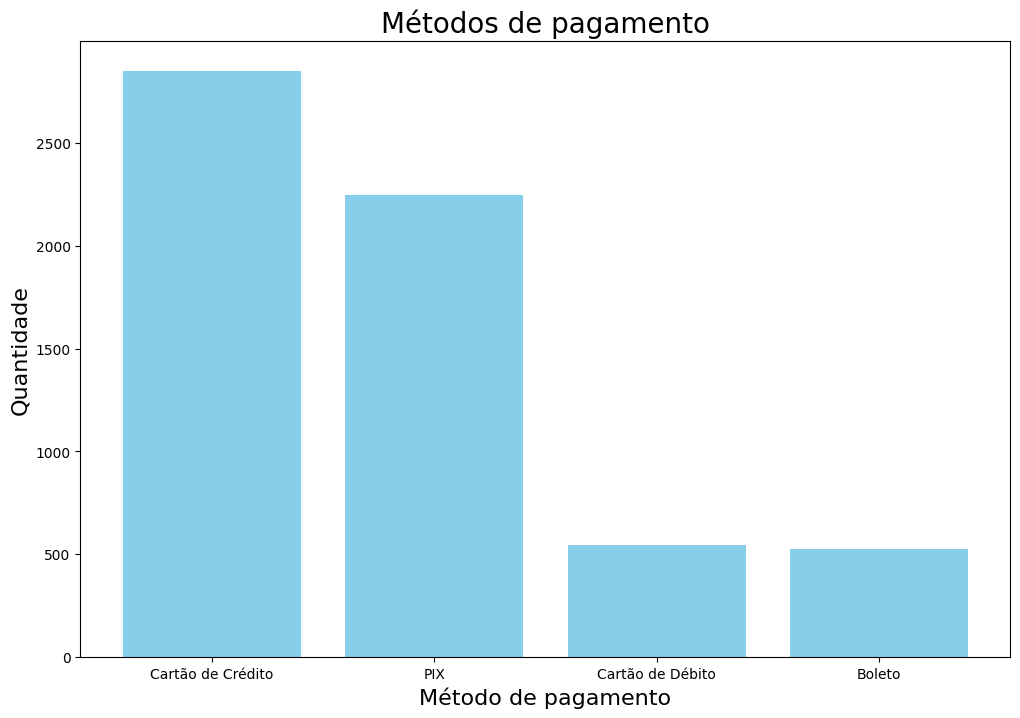

In [51]:
# Visualizando os dados metodo de pagamento
plt.figure(figsize=(12,8))
plt.bar(metodos_de_pagamento['Metodo_de_pagamento'],metodos_de_pagamento['Quantidade'],color= 'skyblue')
plt.xlabel('Método de pagamento',fontsize=16)
plt.ylabel('Quantidade',fontsize=16)
plt.xticks(rotation=0,ha='center')
plt.title("Métodos de pagamento",fontsize=20)